In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Read the dataset and rename columns
df = pd.read_csv("/kaggle/input/lovess/heart_disease.tab", sep="\t", header=0, names=["age", "gender", "chest pain", "rest BP", "cholesterol", "fasting blood sugar > 120", "rest ECG", "max heart rate", "exerc ind ang", "ST depression", "slope peak exc ST", "number vessels", "thal", "target"])

# Select rows after the first two
df = df.iloc[2:,:]
df.head(3)

,age,gender,chest pain,rest BP,cholesterol,fasting blood sugar > 120,rest ECG,max heart rate,exerc ind ang,ST depression,slope peak exc ST,number vessels,thal,target
2,63,male,typical ang,145,233,1,left vent hypertrophy,150,0,2.3,downsloping,0,fixed defect,0
3,67,male,asymptomatic,160,286,0,left vent hypertrophy,108,1,1.5,flat,3,normal,1
4,67,male,asymptomatic,120,229,0,left vent hypertrophy,129,1,2.6,flat,2,reversable defect,1


# Data Pre Processing and Cleaning

In [8]:
# Make a copy of the original DataFrame
df1 = df.copy()

# Remove rows with '?' values
df1 = df1.replace('?', pd.NA).dropna()

# Select categorical columns
categorical_columns = ['gender', 'chest pain', 'fasting blood sugar > 120', 'rest ECG', 'exerc ind ang', 'slope peak exc ST', 'thal']

# One-hot encode categorical columns
encoded_cols = pd.get_dummies(df1[categorical_columns], drop_first=True)

# Drop the original categorical columns from the data and concatenate the encoded ones
df1 = pd.concat([df1.drop(categorical_columns, axis=1), encoded_cols], axis=1)

# Convert data types if needed
df1 = df1.astype(float)

# Visualizing data to understand it and choose the best features

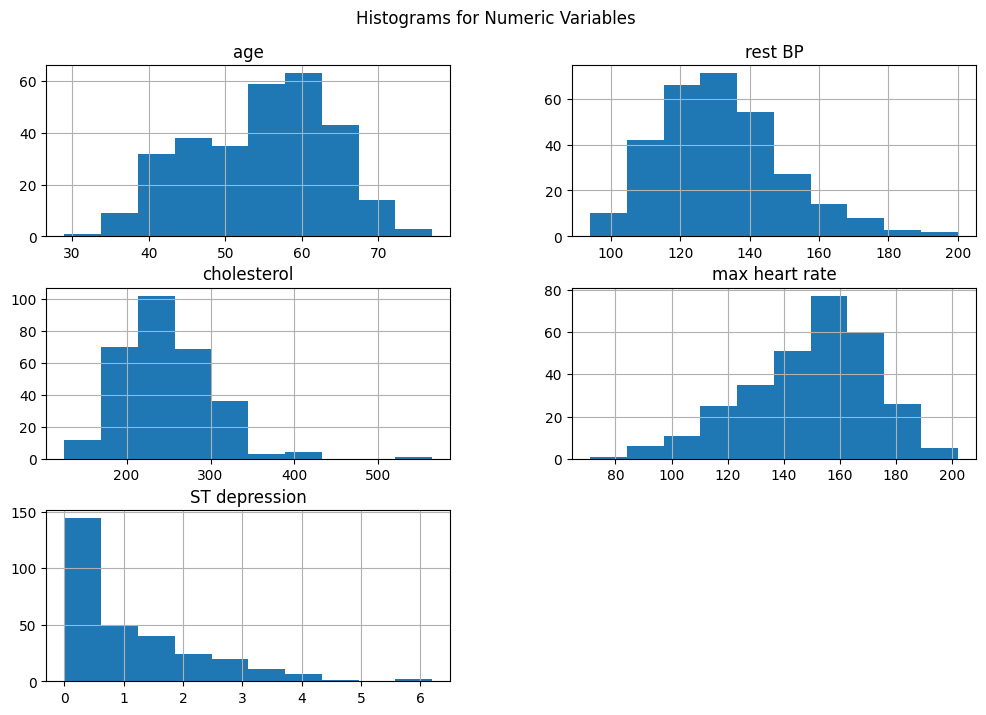

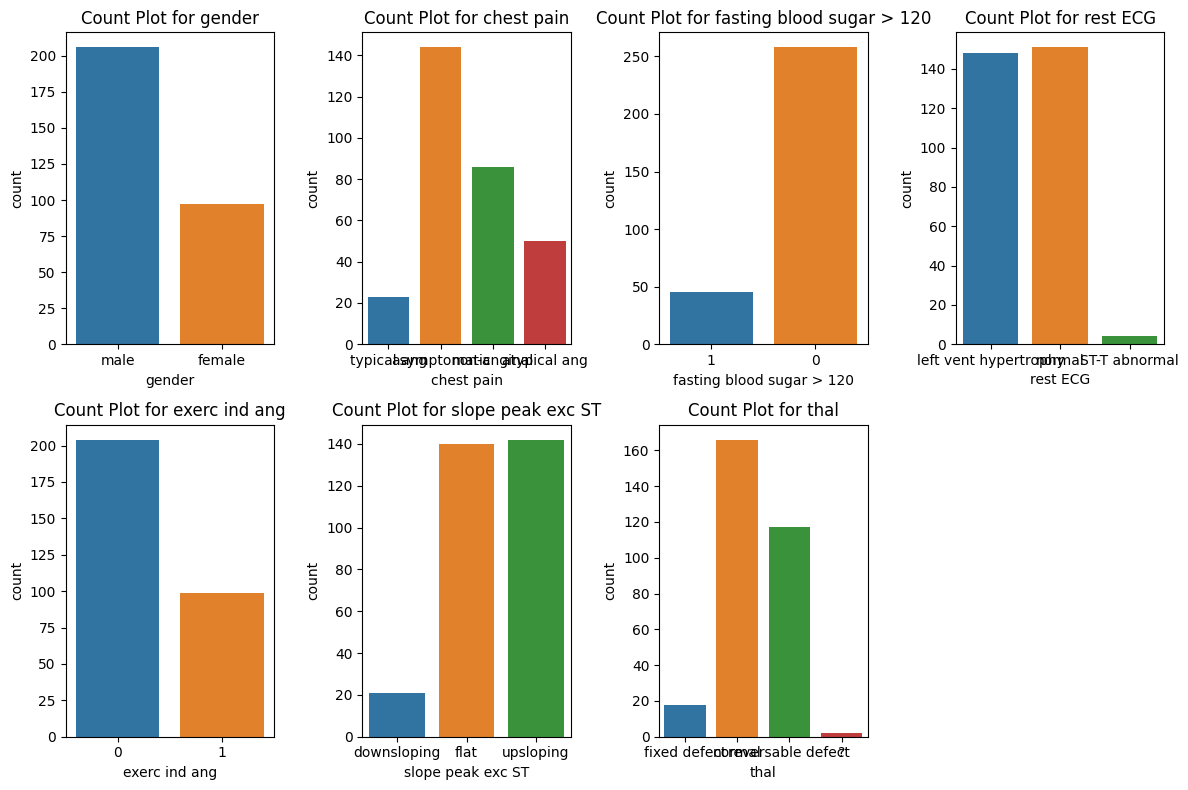

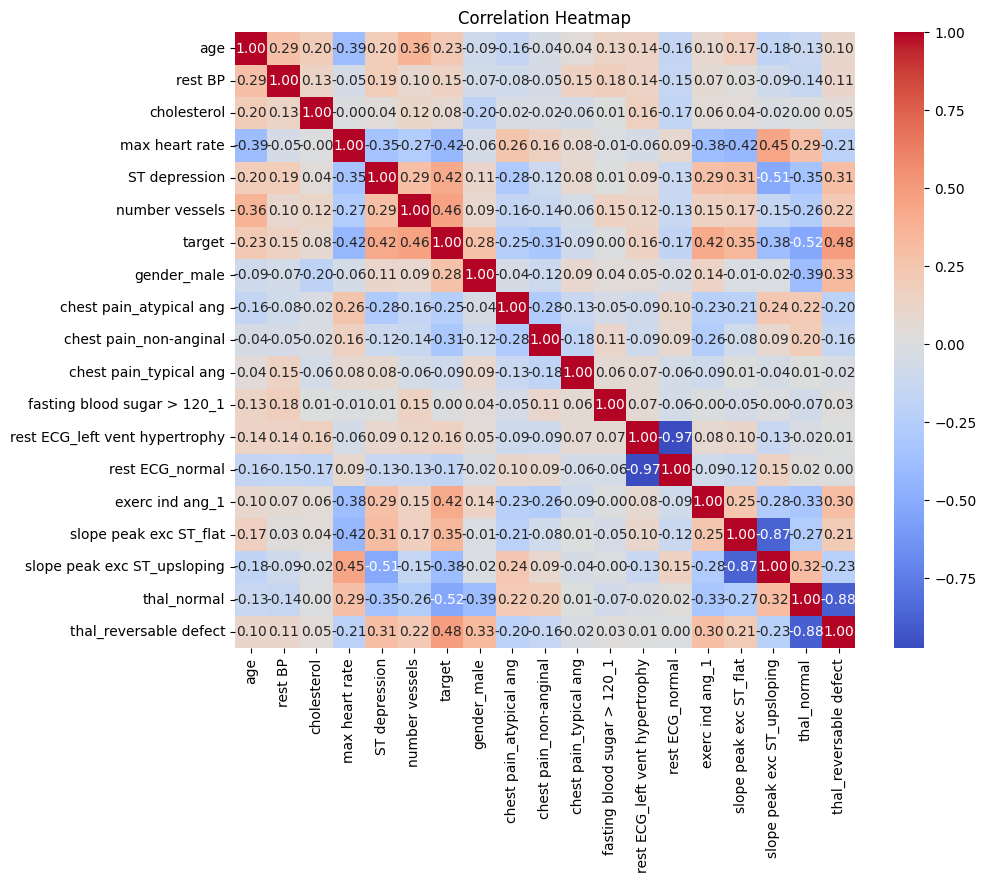

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

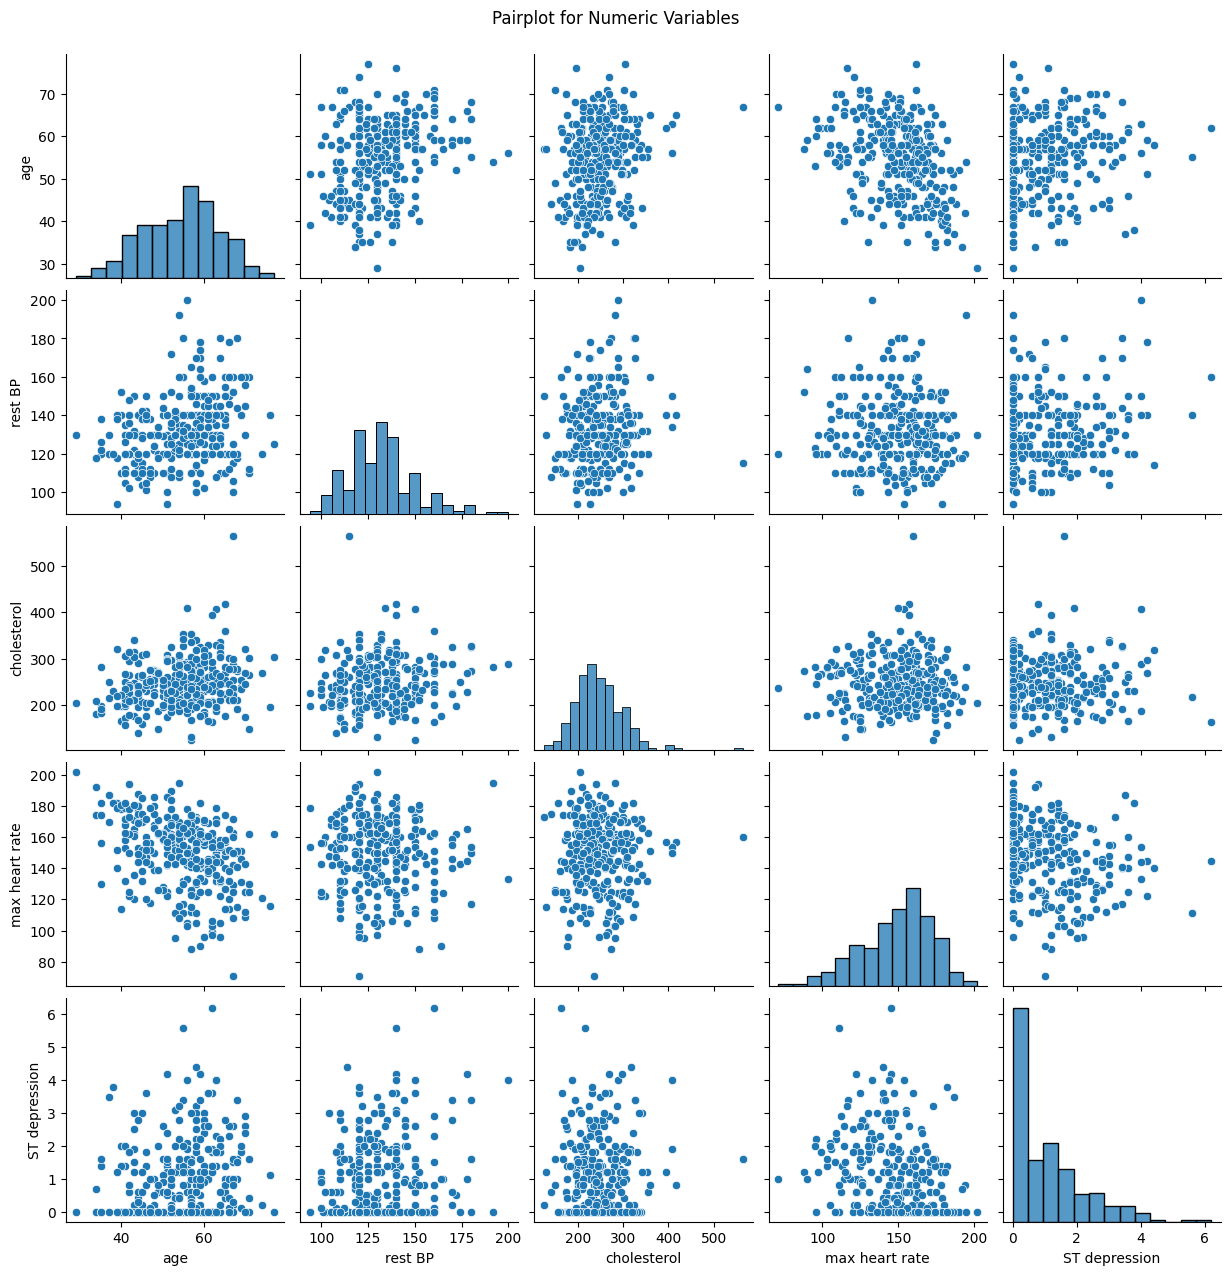

In [9]:
# Histograms for Numeric Variables
numeric_vars = ['age', 'rest BP', 'cholesterol', 'max heart rate', 'ST depression']
df1[numeric_vars].hist(figsize=(12, 8))
plt.suptitle('Histograms for Numeric Variables', y=0.95)
plt.show()

# Count Plot for Categorical Variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=var, data=df)
    plt.title(f'Count Plot for {var}')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(df1[numeric_vars])
plt.suptitle('Pairplot for Numeric Variables', y=1.02)
plt.show()



# Spliting the data, building and testing the ML models 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8833333333333333
Random Forest Accuracy: 0.8666666666666667


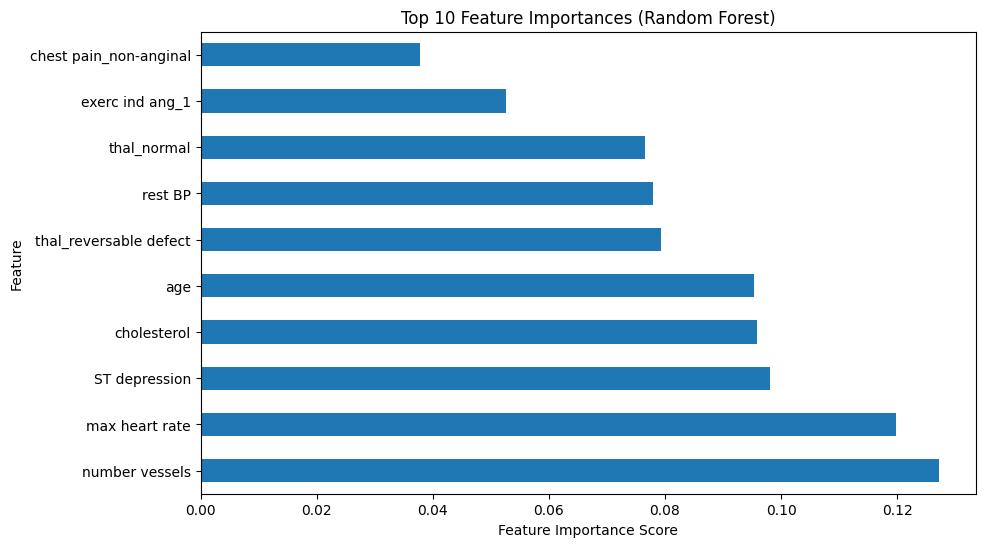

In [10]:

# Split data into features and target
X = df1.drop('target', axis=1)
y = df1['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

print("Random Forest Accuracy:", random_forest_accuracy)

# Feature Importance Plot (Random Forest)
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

# Diplaying the confusion matrix and how the models perform

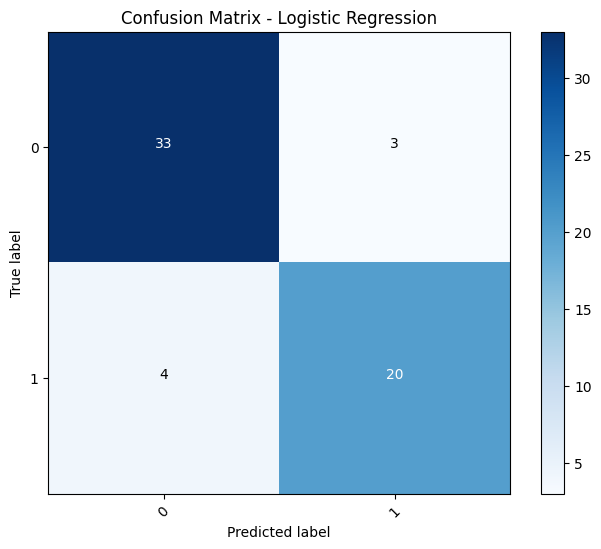

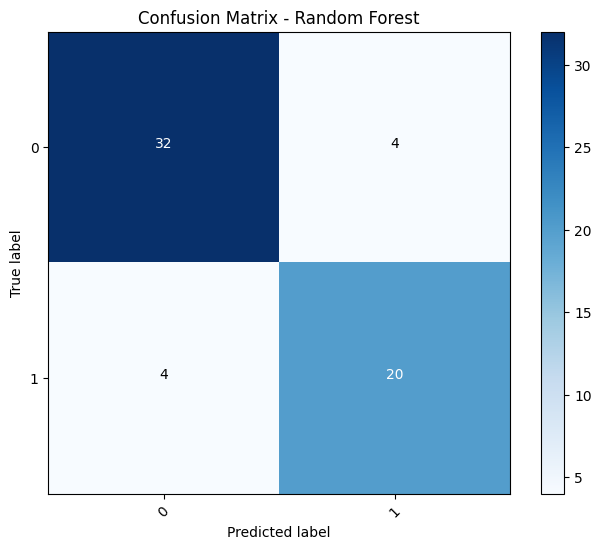

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Generate confusion matrix for Logistic Regression
logistic_regression_cm = confusion_matrix(y_test, logistic_regression_pred)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_cm, classes=['0', '1'], title='Confusion Matrix - Logistic Regression')
plt.show()

# Generate confusion matrix for Random Forest
random_forest_cm = confusion_matrix(y_test, random_forest_pred)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
plot_confusion_matrix(random_forest_cm, classes=['0', '1'], title='Confusion Matrix - Random Forest')
plt.show()
